# Just-in-time Compilation with [Numba](http://numba.pydata.org/) 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import numba

Matplotlib is building the font cache using fc-list. This may take a moment.


## Using `numba.jit`

Numba offers `jit` which can used to decorate Python functions.

In [2]:
def is_prime(n):
    if n <= 1:
        raise ArithmeticError('"%s" <= 1' % n)
    if n == 2 or n == 3:
        return True
    elif n % 2 == 0:
        return False
    else:
        n_sqrt = math.ceil(math.sqrt(n))
        for i in range(3, n_sqrt):
            if n % i == 0:
                return False
            
    return True

In [3]:
n = np.random.randint(2, 10000000, dtype=np.int64) # Get a random integer between 2 and 10000000
print(n, is_prime(n))

1799749 False


In [6]:
is_prime(1)

ArithmeticError: "1" <= 1

In [7]:
@numba.jit
def is_prime_jitted(n):
    if n <= 1:
        raise ArithmeticError('"%s" <= 1' % n)
    if n == 2 or n == 3:
        return True
    elif n % 2 == 0:
        return False
    else:
        n_sqrt = math.ceil(math.sqrt(n))
        for i in range(3, n_sqrt):
            if n % i == 0:
                return False

    return True

In [8]:
numbers = np.random.randint(2, 100000, dtype=np.int64, size=10000)
%timeit p1 = [is_prime(n) for n in numbers]
%timeit p2 = [is_prime_jitted(n) for n in numbers]

116 ms ± 612 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<ipython-input-7-5628b590bd13>:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Internal error in pre-inference rewriting pass encountered during compilation of function "is_prime_jitted" due to: Constant inference not possible for: $const8.2 % n

File "<ipython-input-7-5628b590bd13>", line 4:
def is_prime_jitted(n):
    <source elided>
    if n <= 1:
        raise ArithmeticError('"%s" <= 1' % n)
        ^

  @numba.jit
/apps/daint/UES/6.0.UP04/sandboxes/sarafael/miniconda-pythonhpc/lib/python3.6/site-packages/numba/object_mode_passes.py:178: NumbaWarning: Function "is_prime_jitted" was compiled in object mode without forceobj=True.

File "<ipython-input-7-5628b590bd13>", line 2:
@numba.jit
def is_prime_jitted(n):
^

  state.func_ir.loc))
/apps/daint/UES/6.0.UP04/sandboxes/sarafael/miniconda-pythonhpc/lib/python3.6/site-packages/numba/object_mode_passes.py:187: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the ob

139 ms ± 1.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Using `numba.jit` with `nopython=True`

In [11]:
@numba.jit(nopython=True)
def is_prime_njitted(n):
    if n <= 1:
        raise ArithmeticError('n <= 1 doesn\'t work!')
    if n == 2 or n == 3:
        return True
    elif n % 2 == 0:
        return False
    else:
        n_sqrt = math.ceil(math.sqrt(n))
        for i in range(3, n_sqrt):
            if n % i == 0:
                return False

    return True

In [12]:
numbers = np.random.randint(2, 100000, dtype=np.int64, size=1000)
%timeit p1 = [is_prime_jitted(n) for n in numbers]
%timeit p2 = [is_prime_njitted(n) for n in numbers]

12.3 ms ± 67.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
433 µs ± 1.92 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Using ` @numba.jit(nopython=True)` is equivalent to using ` @numba.njit`

In [ ]:
@numba.njit
def is_prime_njitted(n):
    if n <= 1:
        raise ArithmeticError('n <= 1')
    if n == 2 or n == 3:
        return True
    elif n % 2 == 0:
        return False
    else:
        n_sqrt = math.ceil(math.sqrt(n))
        for i in range(3, n_sqrt):
            if n % i == 0:
                return False

    return True

In [ ]:
numbers = np.random.randint(2, 100000, dtype=np.int64, size=1000)
%time p = [is_prime_njitted(n) for n in numbers]
%time p = [is_prime_njitted(n) for n in numbers]

## Use `cache=True` to cache the compiled function

In [ ]:
import math
from numba import njit

@njit(cache=True)
def is_prime_njitted_cached(n):
    if n <= 1:
        raise ArithmeticError('n <= 1')
    if n == 2 or n == 3:
        return True
    elif n % 2 == 0:
        return False
    else:
        n_sqrt = math.ceil(math.sqrt(n))
        for i in range(3, n_sqrt):
            if n % i == 0:
                return False

    return True

In [ ]:
numbers = np.random.randint(2, 100000, dtype=np.int64, size=1000)
%time p = [is_prime_njitted_cached(n) for n in numbers]
%time p = [is_prime_njitted_cached(n) for n in numbers]

## Eager compilation using function signatures

In [16]:
import math
from numba import njit

@njit(['boolean(int64)', 'boolean(int32)'])
def is_prime_njitted_eager(n):
    if n <= 1:
        raise ArithmeticError('n <= 1')
    if n == 2 or n == 3:
        return True
    elif n % 2 == 0:
        return False
    else:
        n_sqrt = math.ceil(math.sqrt(n))
        for i in range(3, n_sqrt):
            if n % i == 0:
                return False

    return True

In [15]:
numbers = np.random.randint(2, 1000000, dtype=np.int64, size=1000)
%timeit p1 = [is_prime_njitted(n) for n in numbers]
%timeit p2 = [is_prime_njitted_eager(n) for n in numbers]

645 µs ± 1.48 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
659 µs ± 1.57 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
p1 = [is_prime_njitted_eager(n) for n in numbers.astype(np.int32)]
#p2 = [is_prime_njitted_eager(n) for n in numbers.astype(np.float64)]

## Calculating and plotting the [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set)

In [17]:
X, Y = np.meshgrid(np.linspace(-2.0, 1, 1000), np.linspace(-1.0, 1.0, 1000))

def mandelbrot(X, Y, itermax):
    mandel = np.empty(shape=X.shape, dtype=np.int32)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            it = 0
            cx = X[i, j]
            cy = Y[i, j]
            x = 0.0
            y = 0.0
            while x * x + y * y < 4.0 and it < itermax:
                x, y = x * x - y * y + cx, 2.0 * x * y + cy
                it += 1
            mandel[i, j] = it
            
    return mandel

CPU times: user 30.3 s, sys: 139 µs, total: 30.3 s
Wall time: 30.3 s


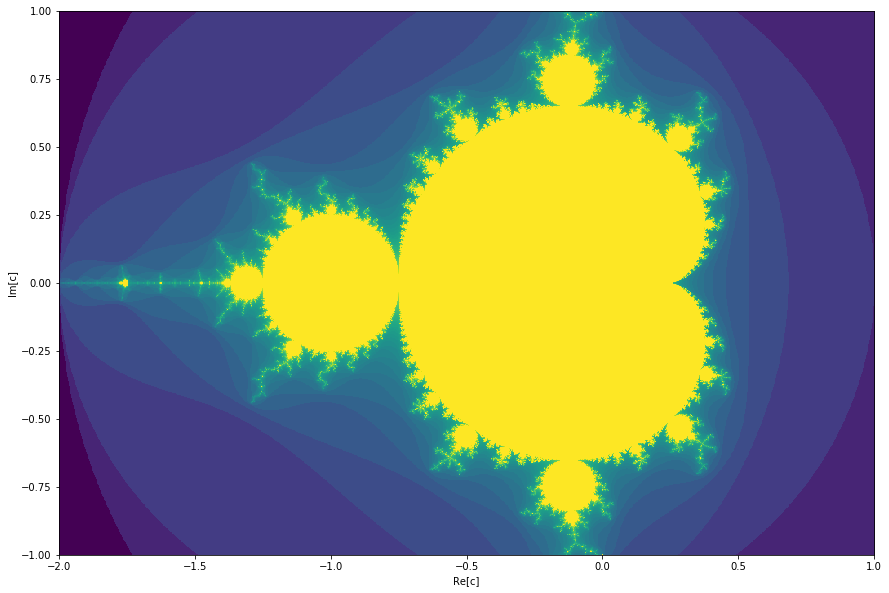

In [21]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)

%time m = mandelbrot(X, Y, 100)
    
ax.imshow(np.log(1 + m), extent=[-2.0, 1, -1.0, 1.0]);
ax.set_aspect('equal')
ax.set_ylabel('Im[c]')
ax.set_xlabel('Re[c]');

In [27]:
@numba.njit(parallel=True)
def mandelbrot_jitted(X, Y, radius2, itermax):
    mandel = np.empty(shape=X.shape, dtype=np.int32)
    for i in numba.prange(X.shape[0]):
        for j in numba.prange(X.shape[1]):
            it = 0
            cx = X[i, j]
            cy = Y[i, j]
            x = cx
            y = cy
            while x * x + y * y < 4.0 and it < itermax:
                x, y = x * x - y * y + cx, 2.0 * x * y + cy
                it += 1
            mandel[i, j] = it
            
    return mandel

10.6 ms ± 15.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


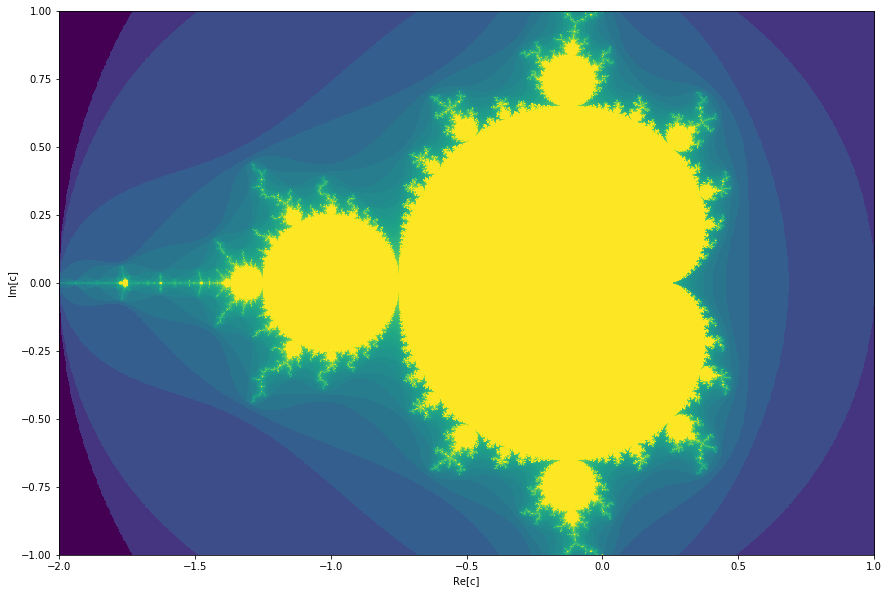

In [32]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)


%timeit -n 1000 m = mandelbrot_jitted(X, Y, 4.0, 100)
    
ax.imshow(np.log(1 + m), extent=[-2.0, 1, -1.0, 1.0]);
ax.set_aspect('equal')
ax.set_ylabel('Im[c]')
ax.set_xlabel('Re[c]');

### Getting parallelization information

In [33]:
mandelbrot_jitted.parallel_diagnostics(level=4)

 
 Parallel Accelerator Optimizing:  Function mandelbrot_jitted, <ipython-
input-27-3f338cd37bfc> (1)  


Parallel loop listing for  Function mandelbrot_jitted, <ipython-input-27-3f338cd37bfc> (1) 
---------------------------------------------------------------|loop #ID
@numba.njit(parallel=True)                                     | 
def mandelbrot_jitted(X, Y, radius2, itermax):                 | 
    mandel = np.empty(shape=X.shape, dtype=np.int32)           | 
    for i in numba.prange(X.shape[0]):-------------------------| #2
        for j in numba.prange(X.shape[1]):---------------------| #1
            it = 0                                             | 
            cx = X[i, j]                                       | 
            cy = Y[i, j]                                       | 
            x = cx                                             | 
            y = cy                                             | 
            while x * x + y * y < 4.0 and it < itermax:        | 

## Creating `ufuncs` using `numba.vectorize`

In [ ]:
from math import sin
from numba import float64, int64

def my_numpy_sin(a, b): # NumPy doesn't have a ufunc version of sin(x)
    return np.sin(a) + np.sin(b)

@np.vectorize
def my_sin(a, b):
    return sin(a) + sin(b)

@numba.vectorize([float64(float64, float64), int64(int64, int64)], target='parallel')
def my_sin_numba(a, b):
    return np.sin(a) + np.sin(b)

In [ ]:
x = np.random.randint(0, 100, size=9000000)
y = np.random.randint(0, 100, size=9000000)

%time _ = my_numpy_sin(x, y)
%time _ = my_sin(x, y)
%time _ = my_sin_numba(x, y)

### Vectorize the testing of prime numbers 

In [ ]:
@numba.vectorize('boolean(int64)')
def is_prime_v(n):
    if n <= 1:
        raise ArithmeticError(f'"0" <= 1')
    if n == 2 or n == 3:
        return True
    elif n % 2 == 0:
        return False
    else:
        n_sqrt = math.ceil(math.sqrt(n))
        for i in range(3, n_sqrt):
            if n % i == 0:
                return False
            
    return True

In [ ]:
numbers = np.random.randint(2, 10000000000, dtype=np.int64, size=100000)
%time p = is_prime_v(numbers)

### Parallelize the vectorized function

In [ ]:
@numba.vectorize(['boolean(int64)', 'boolean(int32)'],
                 target='parallel')
def is_prime_vp(n):
    if n <= 1:
        raise ArithmeticError('n <= 1')
    if n == 2 or n == 3:
        return True
    elif n % 2 == 0:
        return False
    else:
        n_sqrt = math.ceil(math.sqrt(n))
        for i in range(3, n_sqrt):
            if n % i == 0:
                return False
            
    return True

In [ ]:
numbers = np.random.randint(2, 10000000000, dtype=np.int64, size=100000)
%time p1 = is_prime_v(numbers)
%time p2 = is_prime_vp(numbers)

In [ ]:
# Print the largest primes from to 1 and 10 millions
numbers = np.arange(1000000, 10000001, dtype=np.int32)
%time p1 = is_prime_vp(numbers)
primes = numbers[p1]

for n in primes[-10:]:
    print(n)